In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from astropy.io import fits
import numpy as np 

In [2]:
path = 'C:/Users/User/Desktop/Projeto/GG.csv'
planilha = pd.read_csv(path)

In [85]:
A = list(planilha.A)
ID = list(planilha.ID)
r_auto = list(planilha.r_auto)
er_auto = list(planilha.er_auto)
PF = list(planilha.PhotoFlag)
Adec = sorted(A, reverse=True)
X = Adec[100]

In [105]:
Dfl = pd.DataFrame({'ID': ID,'A': A, 'r_auto': r_auto, 'er_auto': er_auto, 'PhotoFlag': PF})
PF0 = Dfl[Dfl['PhotoFlag']==0]
PF01 = PF0.sort_values('A', ascending=False)
PR = PF01[PF01['r_auto']<14]
NQ = PF01[0:50]



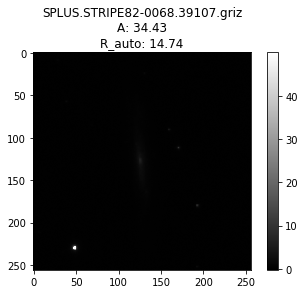

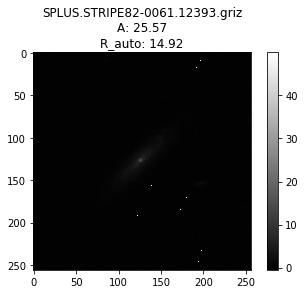

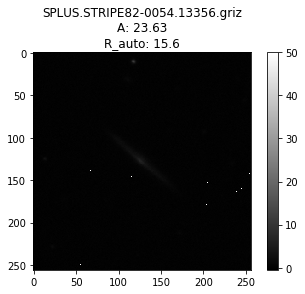

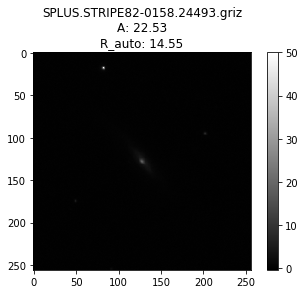

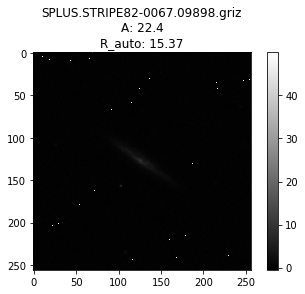

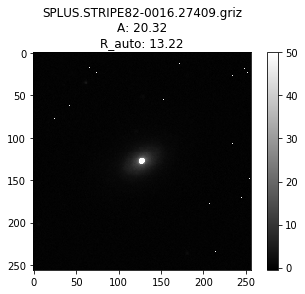

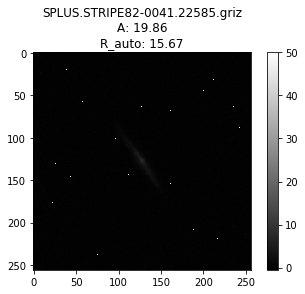

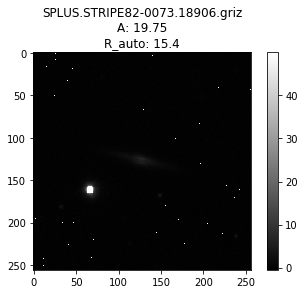

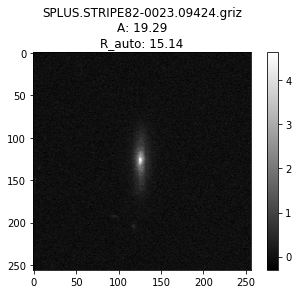

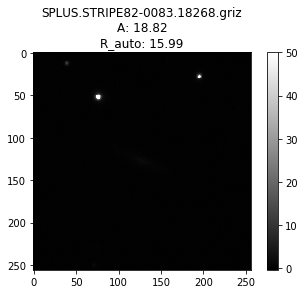

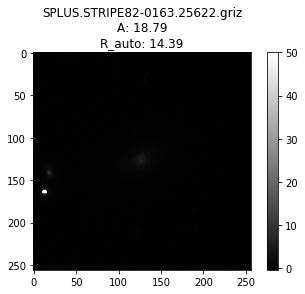

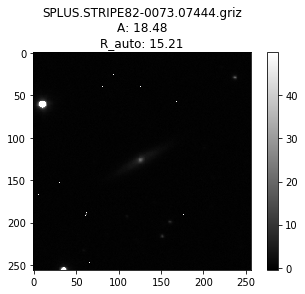

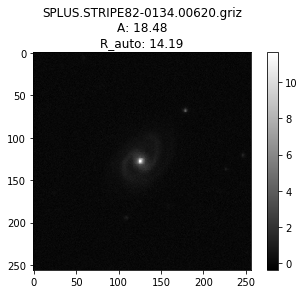

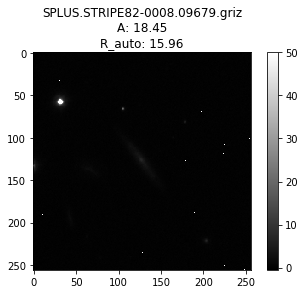

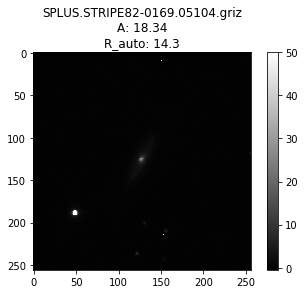

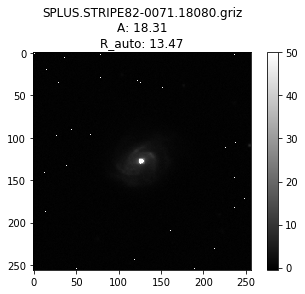

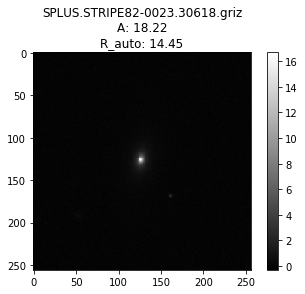

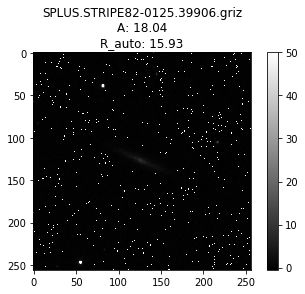

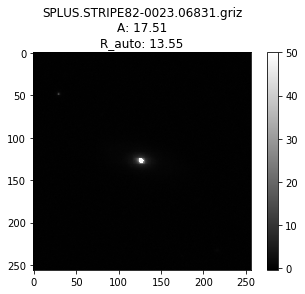

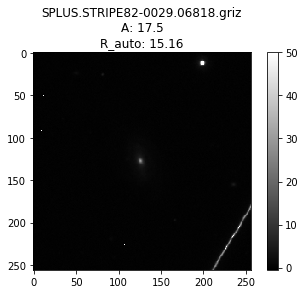

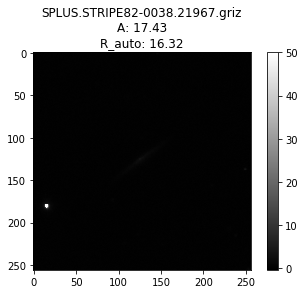

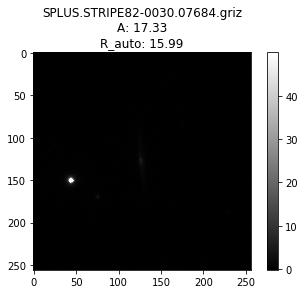

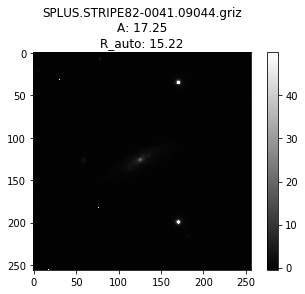

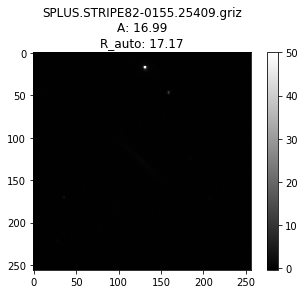

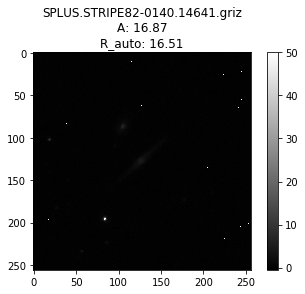

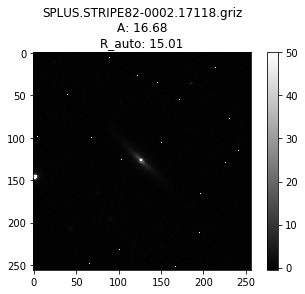

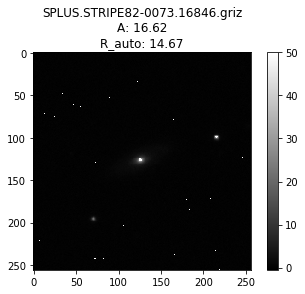

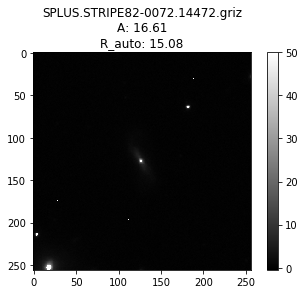

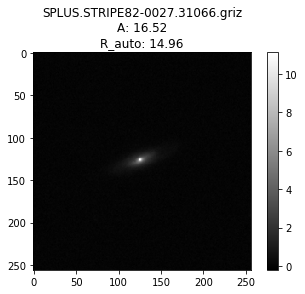

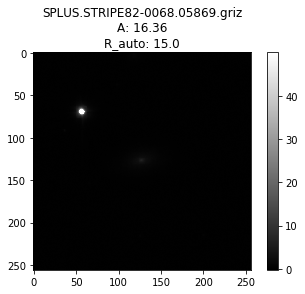

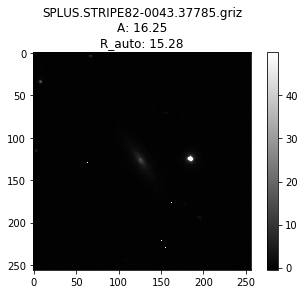

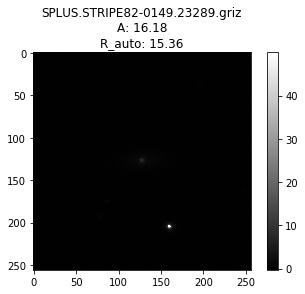

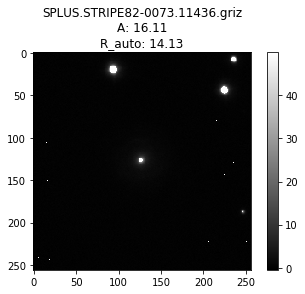

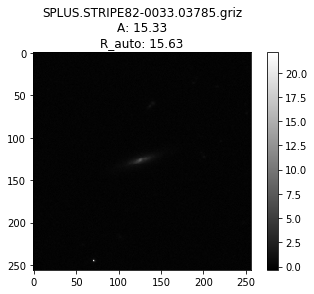

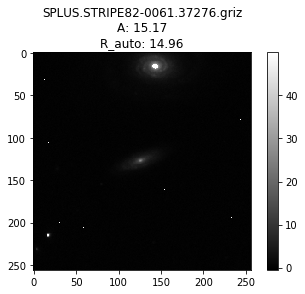

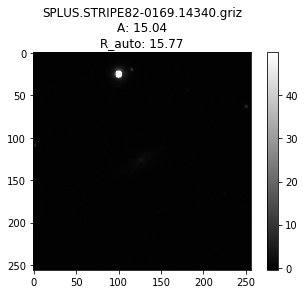

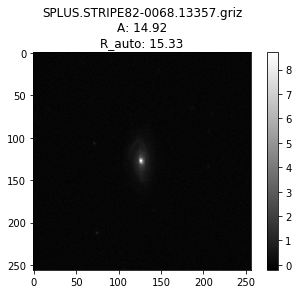

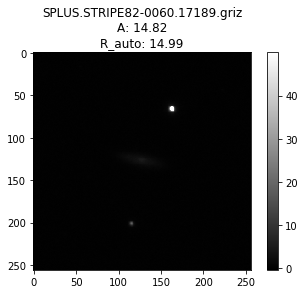

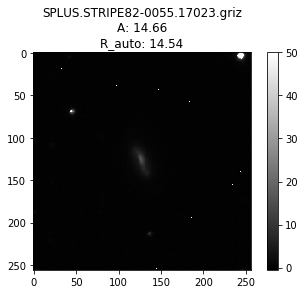

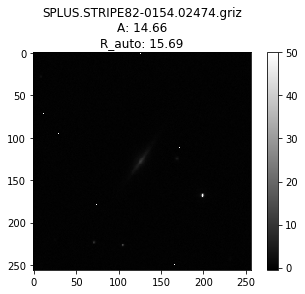

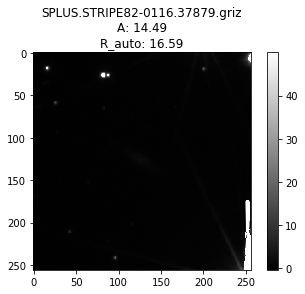

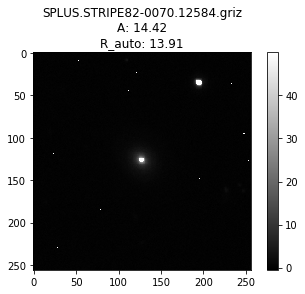

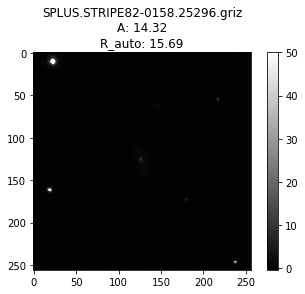

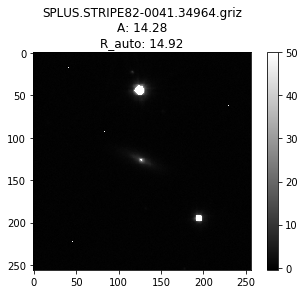

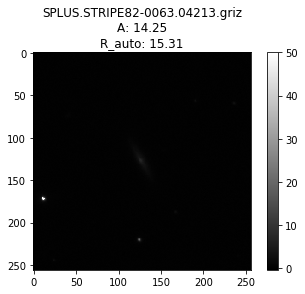

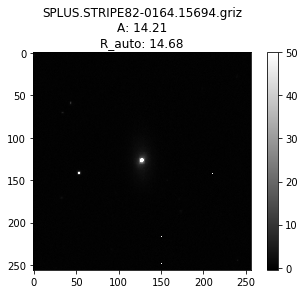

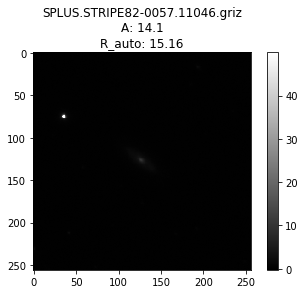

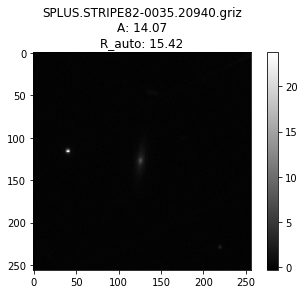

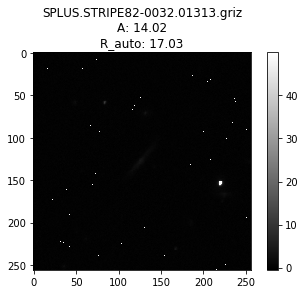

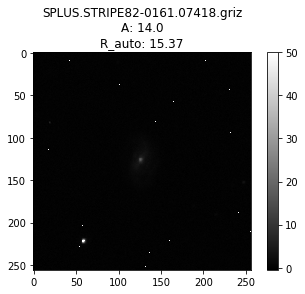

In [106]:
l = lambda x: x if x < 30 and x > -0.5 else 50
vector = np.vectorize(l)

for k in NQ.iterrows():
  im_array = fits.getdata(f'D:/Projeto/R_stamps.tar/R_stamps/{k[1]["ID"]}_R.fits')
  plt.title(k[1]["ID"] + '\n' + 'A: ' + str(k[1]['A'])+ '\n' + 'R_auto: ' + str(k[1]['r_auto']) )
  plt.imshow(vector(im_array), cmap='gray')
  plt.colorbar()
  plt.show()
  # plt.savefig(k[1]["ID"] + '.png')

In [108]:
import shutil 
import os
for k in NQ.iterrows():
    Saida = (f'D:/Projeto/R_stamps.tar/R_stamps/{k[1]["ID"]}_R.fits')
    shutil.copy(Saida, 'C:/Projeto/PF 0 MA')